# <span style="color:orange;">**Projet Financement**</span>
## **Objectif précis d'utilisation du jeu de donnée :**
* On cherche à savoir si un **nouveau projet inscrit** sur la platforme sera **financé** et si oui, à **quelle hauteur** ? (100%, 110% , 150%, ...)

## **Décomposition du notebook**
- Nettoyage des données
- Exploration des données et Feature Engineering
- Création de modèle prédictif
---

### <span style="color:#33ff99;">**Import des Librairies**</span>

In [142]:
import numpy as np             
import pandas as pd             
import os                       
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import squarify
from IPython.display import display
from random import seed
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder  
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### <span style="color:#33ff99;">**Import des données**</span>

In [143]:
financement = pd.read_csv(filepath_or_buffer='financement.csv', sep=',', header=0, index_col=0)

financement.head(5)

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,promesse_usd2,objectif_usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### <span style="color:lightblue;">**Fonction resume de jeu de données**</span>

In [144]:
def resume_dataframe(df):
    resume_df = pd.DataFrame(index=df.columns)
    resume_df['Type'] = df.dtypes.values
    resume_df['Missing'] = df.isnull().sum().values

    resume_df['Unique'] = df.nunique().values

    for col in df.columns:
        resume_df.loc[col, 'Value_1'] = df[col].iloc[0]
        resume_df.loc[col, 'Value_2'] = df[col].iloc[1]
        resume_df.loc[col, 'Value_3'] = df[col].iloc[2]

    return resume_df

resume_transactions = resume_dataframe(financement)

display(resume_transactions)

C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\1007268014.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'The Songs of Adelaide & Abullah' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\1007268014.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Greeting From Earth: ZGAC Arts Capsule For ET' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\1007268014.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Where is Hank?' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Type,Missing,Unique,Value_1,Value_2,Value_3
ID,int64,0,378661,1000002330.0,1000003930.0,1000004038.0
nom,object,4,375764,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
categorie,object,0,159,Poetry,Narrative Film,Narrative Film
categorie_principale,object,0,15,Publishing,Film & Video,Film & Video
monaie,object,0,14,GBP,USD,USD
date_butoire,object,0,3164,2015-10-09,2017-11-01,2013-02-26
objectif,float64,0,8353,1000.0,30000.0,45000.0
lancement,object,0,378089,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50
promesse,float64,0,62130,0.0,2421.0,220.0
etat,object,0,6,failed,failed,failed


---
### <span style="color:orange;">**Dataprep**</span>

### On **remarque** que la variable promesse_usd1 (= promesse transformé en USD par le site fixer.io est souvent manquante ou valorisé à 0)
#### *Par la suite, on **préferera utiliser promesse_usd2** qui semble plus fiable*

#### <span style="color:lightblue;">**Remplacer les valeurs NaN par 0 dans la colonne promesse_usd1**</span>

In [145]:
financement['promesse_usd1'].fillna(0, inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\2466740678.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





#### <span style="color:lightblue;">**Traitement des dates**</span>
#### <span style="color:lightblue;">**+ ajout ecart entre date de début de lancement de recherche de financement et butoire du projet**</span>

In [146]:
# Pour la date butoire
def get_day(date_str):
    return date_str.split('-')[2]

def get_month(date_str):
    return date_str.split('-')[1]

def get_year(date_str):
    return date_str.split('-')[0]

# Pour la date de lancement
def get_day2(date_str):
    return date_str.split(' ')[0].split('-')[2]

def get_hour(time_str):
    return time_str.split(' ')[1].split(':')[0]

def get_minute(time_str):
    return time_str.split(' ')[1].split(':')[1]

def get_second(time_str):
    return time_str.split(' ')[1].split(':')[2]

# Feature nb de jours d'ecart
def calculer_ecart(date_butoire_str, lancement_str):
    # Convertir les chaînes de caractères en objets datetime
    date_butoire = datetime.strptime(date_butoire_str, '%Y-%m-%d')
    lancement = datetime.strptime(lancement_str.split()[0], '%Y-%m-%d')
    
    # Calculer l'écart entre les deux dates
    ecart = (date_butoire - lancement).days
    
    return ecart

# Date butoire
days_butoire = financement['date_butoire'].apply(get_day)
months_butoire = financement['date_butoire'].apply(get_month)
years_butoire = financement['date_butoire'].apply(get_year)

financement['day_butoire'] = days_butoire
financement['month_butoire'] = months_butoire
financement['year_butoire'] = years_butoire

# Date de lancement
days_lancement = financement['lancement'].apply(get_day2)
months_lancement = financement['lancement'].apply(get_month)
years_lancement = financement['lancement'].apply(get_year)
hours_lancement = financement['lancement'].apply(get_hour)
minutes_lancement = financement['lancement'].apply(get_minute)
seconds_lancement = financement['lancement'].apply(get_second)

#financement['day_lancement'] = days_lancement
financement['month_lancement'] = months_lancement
financement['year_lancement'] = years_lancement
#financement['hour_lancement'] = hours_lancement
#financement['minute_lancement'] = minutes_lancement
#financement['second_lancement'] = seconds_lancement

# Ecart
financement['ecart_jours'] = financement.apply(lambda row: calculer_ecart(row['date_butoire'], row['lancement']), axis=1)

# Afficher les 5 premières lignes du DataFrame après les modifications
display(financement.head())

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,...,pays,promesse_usd1,promesse_usd2,objectif_usd,day_butoire,month_butoire,year_butoire,month_lancement,year_lancement,ecart_jours
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,09,10,2015,08,2015,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,01,11,2017,09,2017,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,26,02,2013,01,2013,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,16,04,2012,03,2012,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,29,08,2015,07,2015,56


---
### <span style="color:orange;">**Dataviz**</span>

#### <span style="color:lightblue;">**Fonction exploration variables catégorielles**</span>

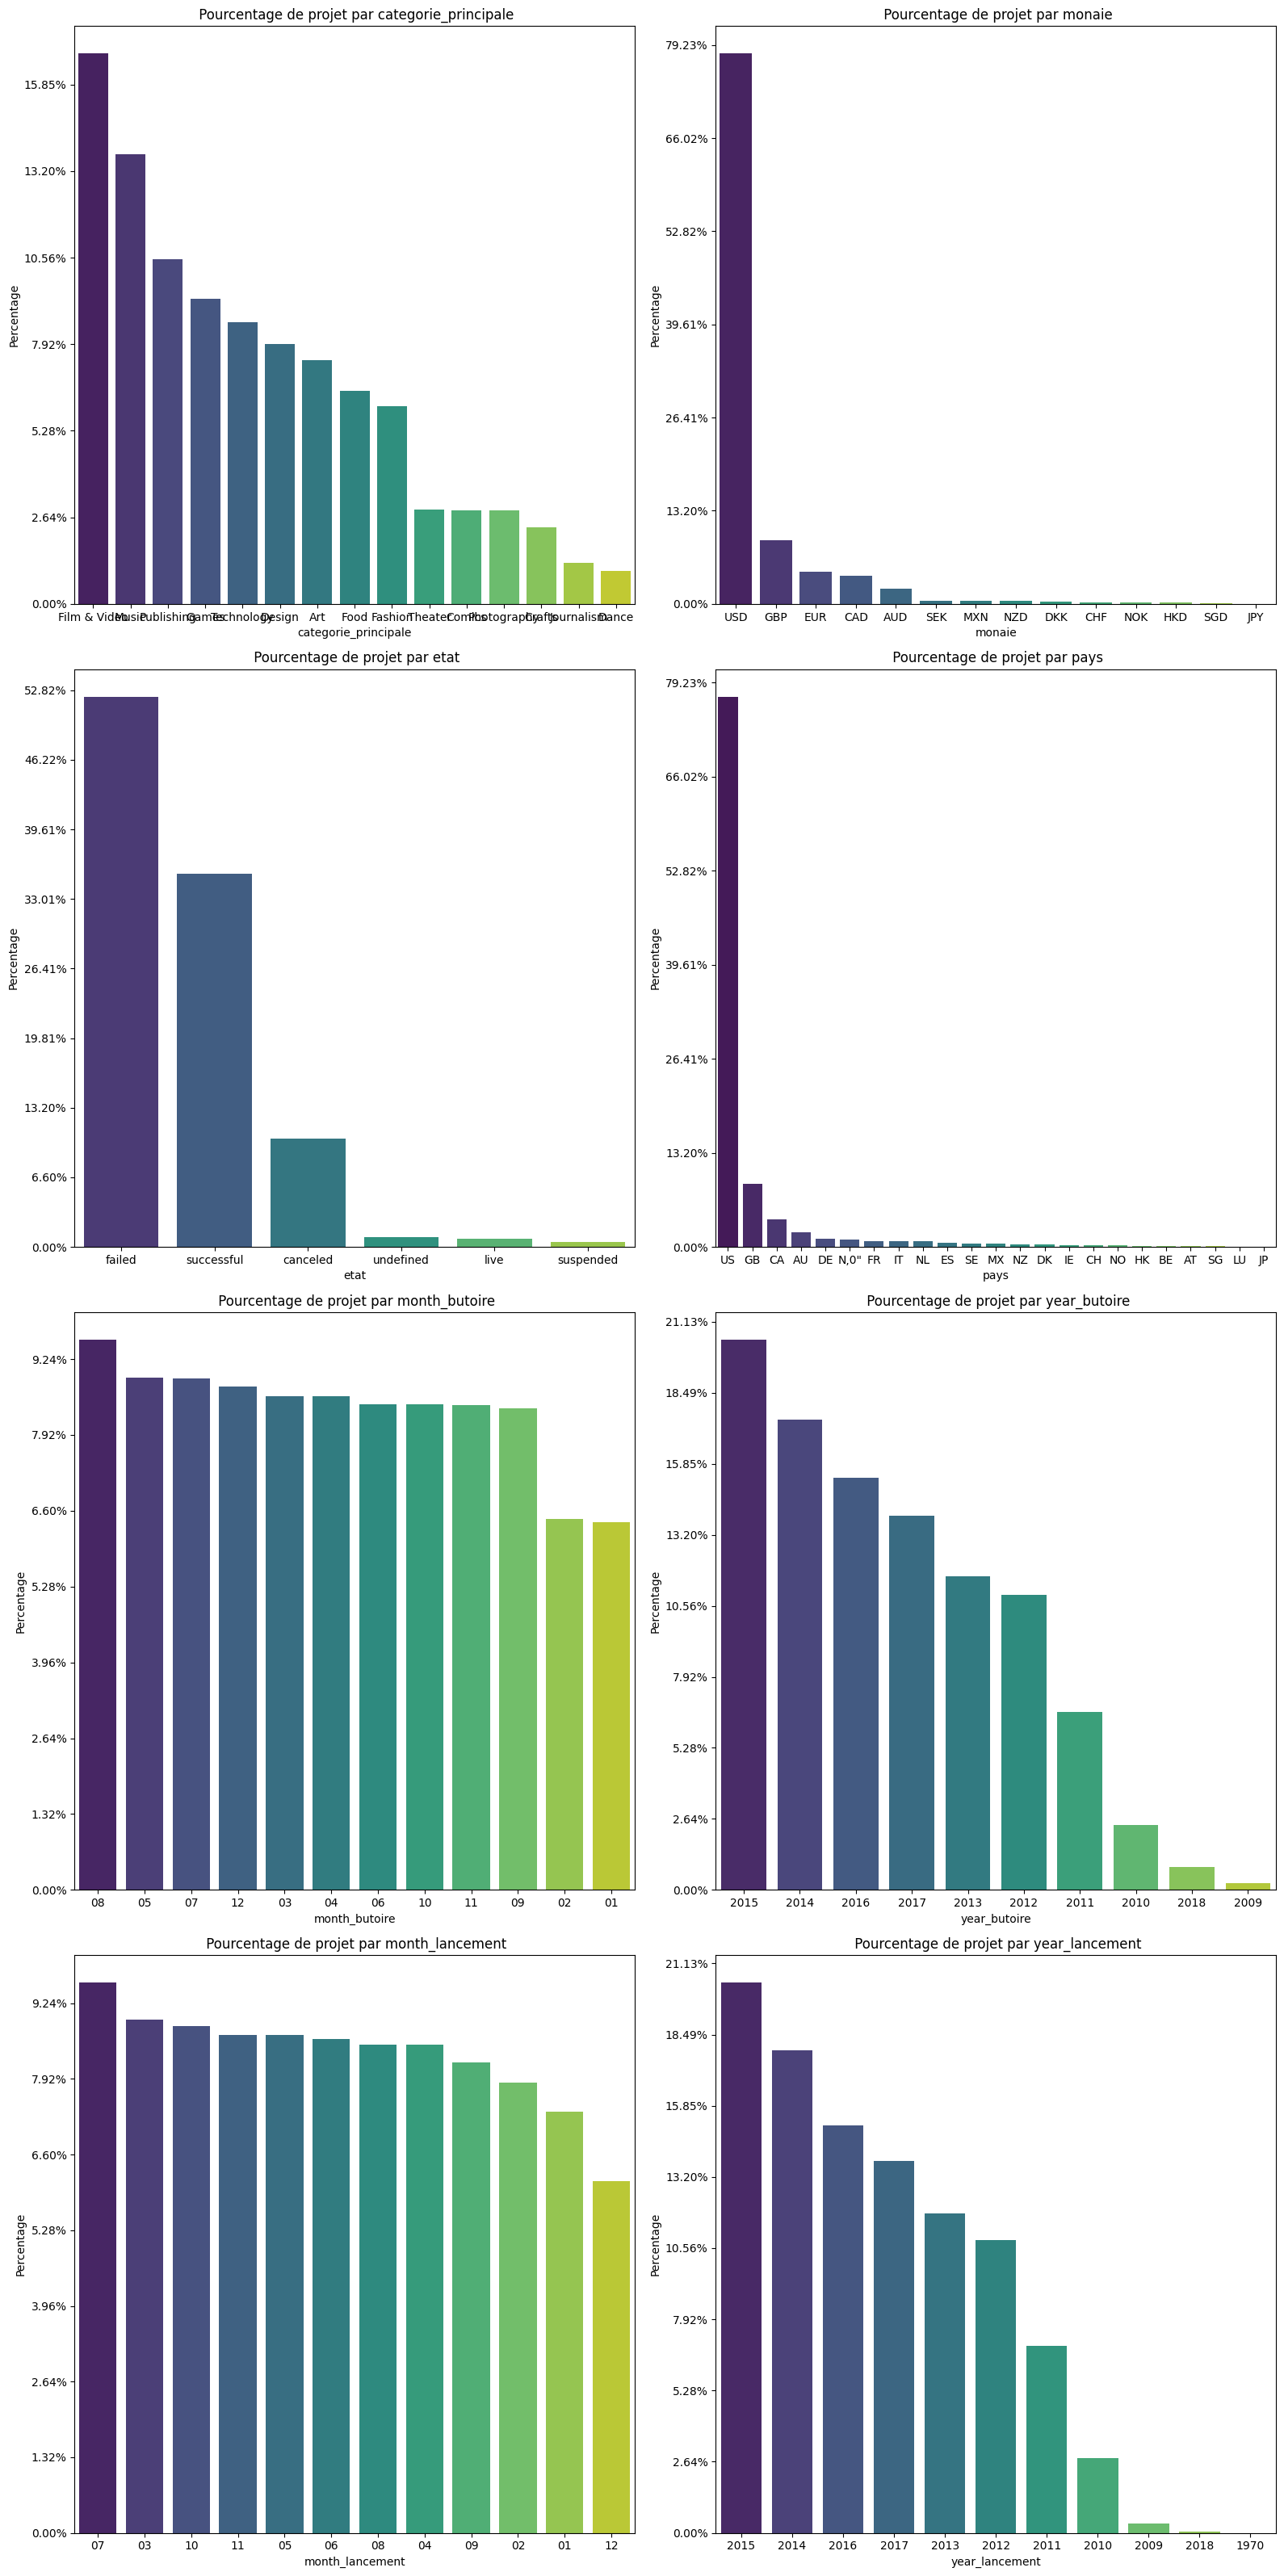

In [147]:
def explore_dataset(df):
    # Exclure la colonne 'ID'
    columns_to_explore = [col for col in df.columns if col != 'ID']
    num_graphs = sum(df[col].nunique() <= 25 for col in columns_to_explore)
    num_cols = 2 
    num_rows = (num_graphs + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8*num_rows))

    graph_counter = 0
    for i, col in enumerate(columns_to_explore):
        if df[col].nunique() <= 25:
            row_pos = graph_counter // num_cols
            col_pos = graph_counter % num_cols
            sns.countplot(x=col, hue=col, data=df, ax=axes[row_pos, col_pos], order=df[col].value_counts().index, palette='viridis', legend=False, hue_order=df[col].value_counts().index)
            axes[row_pos, col_pos].set_title(f' Pourcentage de projet par {col}')
            axes[row_pos, col_pos].set_xlabel(col)
            axes[row_pos, col_pos].set_ylabel('Percentage')

            # Calculer les pourcentages et les afficher sur l'axe y
            total_count = len(df[col])
            def format_func(value, tick_number):
                percentage = (value / total_count) * 100
                return f'{percentage:.2f}%'
            axes[row_pos, col_pos].yaxis.set_major_formatter(FuncFormatter(format_func))

            graph_counter += 1

    plt.tight_layout()
    plt.show()

explore_dataset(financement)


### On **remarque** plusieurs choses:
* La majorité des projets sont issues des États-Unis d'Amérique 
* La majorité des projets ont pour monnaie principale le dollar américain (Cohérent avec le point ci-dessus)
* Environ 1/3 des projets ont été financés *(Penser à vérifier la prop dans les jeux de train/test)*
* Il existe beacoup de pays et certains sont peu représentés. Il serait intéressant de les regrouper par *continent*

C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\3033675205.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




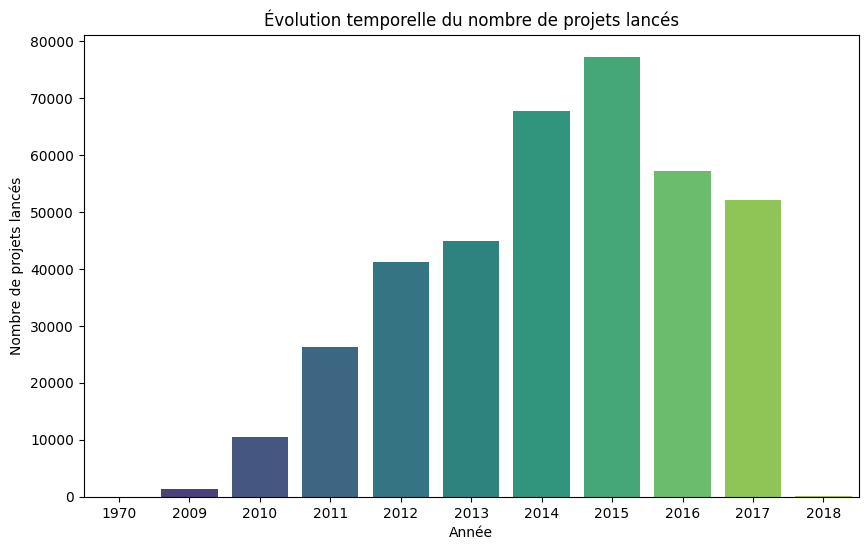

In [172]:
financement['lancement'] = pd.to_datetime(financement['lancement'])
financement['year'] = financement['lancement'].dt.year


plt.figure(figsize=(10, 6))
sns.countplot(data=financement, x='year', palette='viridis')
plt.title('Évolution temporelle du nombre de projets lancés')
plt.xlabel('Année')
plt.ylabel('Nombre de projets lancés')
plt.show()

#### <span style="color:lightblue;">**Treemap Pays**</span>

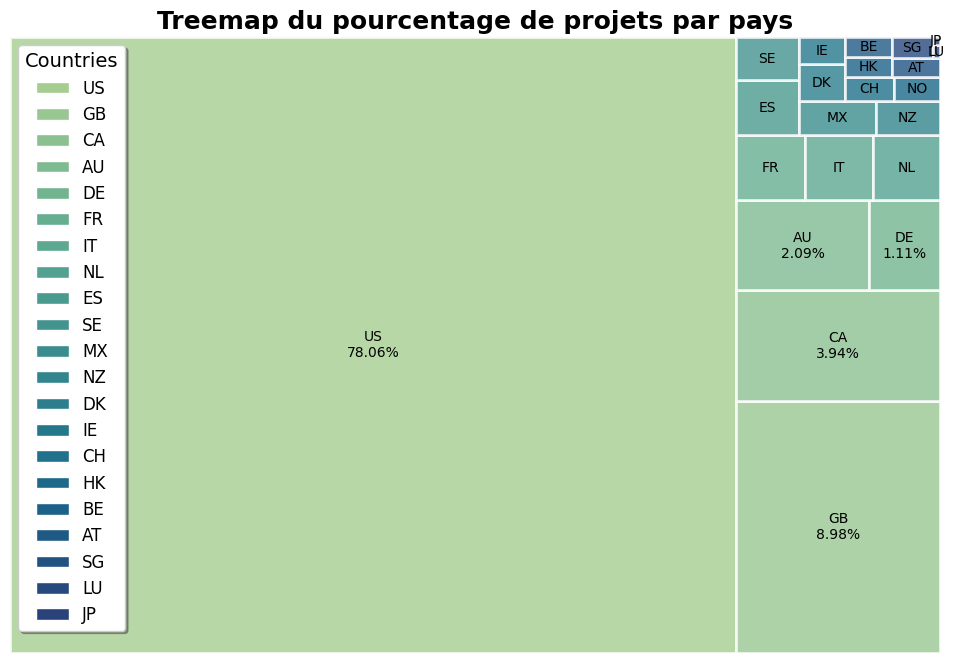

In [148]:
def create_treemap(df, column):
    # Filtrer les données pour exclure le pays "N,0'"
    filtered_df = df[df[column] != 'N,0"']

    counts = filtered_df[column].value_counts()
    
    # Calculer les pourcentages
    percentages = (counts / counts.sum()) * 100
    
    plt.figure(figsize=(12, 8))
    cmap = sns.color_palette("crest", as_cmap=True)
    colors = [cmap(i / len(counts)) for i in range(len(counts))]
    
    # Déterminer la taille de la police en fonction de la taille des boîtes
    sizes = squarify.normalize_sizes(counts.values, 12, 1000)
    
    # Création des étiquettes avec les pourcentages
    labels = []
    for label, percentage in zip(counts.index, percentages):
        if percentage > 1:
            labels.append(f'{label}\n{percentage:.2f}%')
        else:
            labels.append(label)
    
    # Création du treemap avec les paramètres esthétiques personnalisés
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors, edgecolor='white', linewidth=2)
    
    # Ajout de titre et suppression des axes
    plt.title(f'Treemap du pourcentage de projets par {column}', fontsize=18, fontweight='bold')
    plt.axis('off')
    
    # Filtrer les étiquettes de la légende pour exclure le pays "NO'"
    legend_labels = [label for label in counts.index if label != 'NO']
    
    # Création de la légende complète sans le pays "N,0'"
    patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='white') for color in colors]
    plt.legend(patches, legend_labels, loc='upper left', fontsize=12, title='Countries', title_fontsize='14', shadow=True)
    
    plt.show()

# Utilisation de la fonction create_treemap avec la colonne "pays" de financement
create_treemap(financement, 'pays')

#### <span style="color:lightblue;">**Histo Empilé**</span>

<Figure size 1600x800 with 0 Axes>

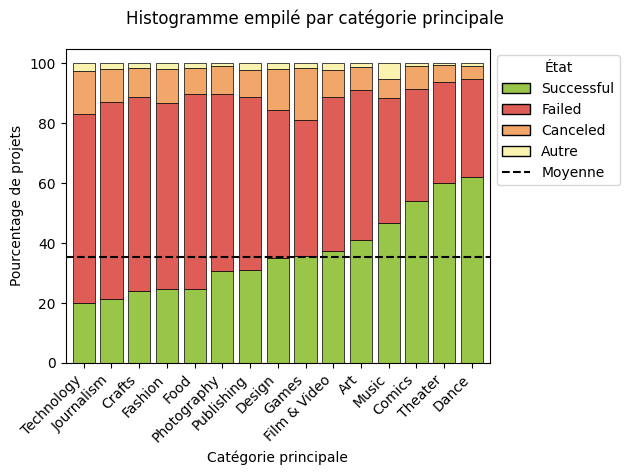

In [149]:
# Définir les couleurs pour chaque état
colors = {'failed': '#DE5E57',
          'successful': '#99C549',
          'Autre': '#FAF3AF',
          'canceled': '#F1A66A'}

df_grouped = financement.copy()
df_grouped['etat'] = df_grouped['etat'].replace({'undefined': 'Autre', 'suspended': 'Autre', 'live': 'Autre'})

# Réorganiser les colonnes dans l'ordre 
ordered_columns = ['successful', 'failed', 'canceled', 'Autre']
grouped = df_grouped.groupby(['categorie_principale', 'etat']).size().unstack(fill_value=0)[ordered_columns]
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Trier les catégories principales par ordre croissant des réussites
categories_sorted = grouped['successful'].sort_values().index

# Réorganiser les données selon l'ordre des catégories triées
grouped = grouped.loc[categories_sorted]

# Création du graphique d'histogramme empilé à 100%
plt.figure(figsize=(16, 8))  
ax = grouped.plot(kind='bar', stacked=True, color=[colors.get(col, '#CCCCCC') for col in grouped.columns], edgecolor='black', linewidth=0.5, width=0.8)  # Ajustement de la largeur des colonnes

# Calculer la moyenne sur toutes les catégories
mean_overall = df_grouped['etat'].value_counts(normalize=True)['successful'] * 100

# Ajouter la ligne de moyenne sur toutes les catégories au graphique
ax.axhline(mean_overall, color='black', linestyle='--', label='Moyenne globale')

# Légende avec les couleurs correspondant à chaque état
legend_labels = [label.capitalize() for label in grouped.columns]
patches = [plt.Rectangle((0,0),1,1,fc=colors.get(col, '#CCCCCC'), edgecolor='black') for col in grouped.columns]
ax.legend(patches + [plt.Line2D([0], [0], linestyle='--', color='black')], legend_labels + ['Moyenne'], title='État', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Histogramme empilé par catégorie principale', y=0.98) 
plt.xlabel('Catégorie principale')
plt.ylabel('Pourcentage de projets')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

#### <span style="color:lightblue;">**Camembert**</span>

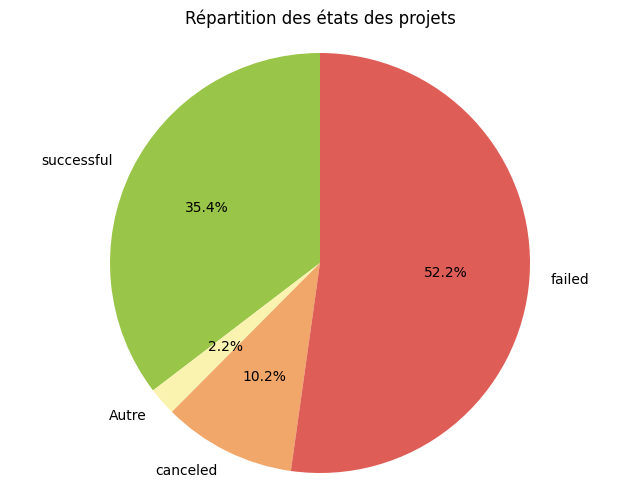

In [150]:
def explore_dataset(df): 
    # Copier et traiter le dataframe
    df_grouped = df.copy()
    df_grouped['etat'] = df_grouped['etat'].replace({'undefined': 'Autre', 'suspended': 'Autre', 'live': 'Autre'})

    # Définir l'ordre des états
    state_order = ['successful', 'Autre', 'canceled', 'failed']

    # Définir les couleurs pour chaque état
    colors = {'failed': '#DE5E57',
              'successful': '#99C549',
              'Autre': '#FAF3AF',
              'canceled': '#F1A66A'}  

    # Trier les valeurs de l'état 
    state_counts = df_grouped['etat'].value_counts().reindex(state_order)

    # Créer un pie chart pour les états des projets 
    plt.figure(figsize=(8, 6))
    plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors.get(state, '#CCCCCC') for state in state_counts.index])
    plt.title('Répartition des états des projets')
    plt.axis('equal') 
    plt.show()

explore_dataset(financement)

#### <span style="color:lightblue;">**Histo Empilé**</span>

<Figure size 1600x800 with 0 Axes>

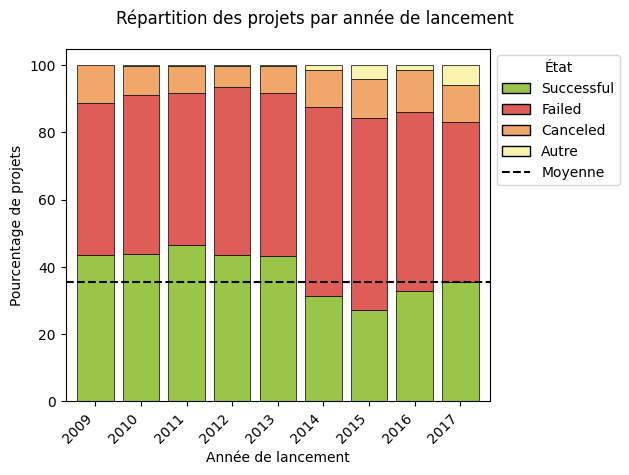

In [151]:
# Définir les couleurs pour chaque état
colors = {'failed': '#DE5E57',
          'successful': '#99C549',
          'Autre': '#FAF3AF',
          'canceled': '#F1A66A'}

# Copier et filtrer le dataframe
df_grouped = financement.copy()
df_grouped['etat'] = df_grouped['etat'].replace({'undefined': 'Autre', 'suspended': 'Autre', 'live': 'Autre'})

# Filtrer les lignes où year_lancement n'est pas égal à 2018 ou 1970
df_grouped = df_grouped[~((df_grouped['year_lancement'] == '2018') | (df_grouped['year_lancement'] == '1970'))]

# Réorganiser les colonnes 
ordered_columns = ['successful', 'failed', 'canceled', 'Autre']
grouped = df_grouped.groupby(['year_lancement', 'etat']).size().unstack(fill_value=0)[ordered_columns]
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Trier les données par year_lancement dans l'ordre chronologique
grouped = grouped.sort_values(by='year_lancement')

# Création du graphique d'histogramme empilé à 100%
plt.figure(figsize=(16, 8))  
ax = grouped.plot(kind='bar', stacked=True, color=[colors.get(col, '#CCCCCC') for col in grouped.columns], edgecolor='black', linewidth=0.5, width=0.8)  # Ajustement de la largeur des colonnes

# Calculer la moyenne sur toutes les catégories
mean_overall = df_grouped['etat'].value_counts(normalize=True)['successful'] * 100

# Ajouter la ligne de moyenne sur toutes les catégories au graphique
ax.axhline(mean_overall, color='black', linestyle='--', label='Moyenne globale')

# Légende personnalisée avec les couleurs correspondant à chaque état
legend_labels = [label.capitalize() for label in grouped.columns]
patches = [plt.Rectangle((0,0),1,1,fc=colors.get(col, '#CCCCCC'), edgecolor='black') for col in grouped.columns]
ax.legend(patches + [plt.Line2D([0], [0], linestyle='--', color='black')], legend_labels + ['Moyenne'], title='État', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Répartition des projets par année de lancement', y=0.98)  
plt.xlabel('Année de lancement')
plt.ylabel('Pourcentage de projets')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

#### <span style="color:lightblue;">**Histo Empilé**</span>

<Figure size 1600x800 with 0 Axes>

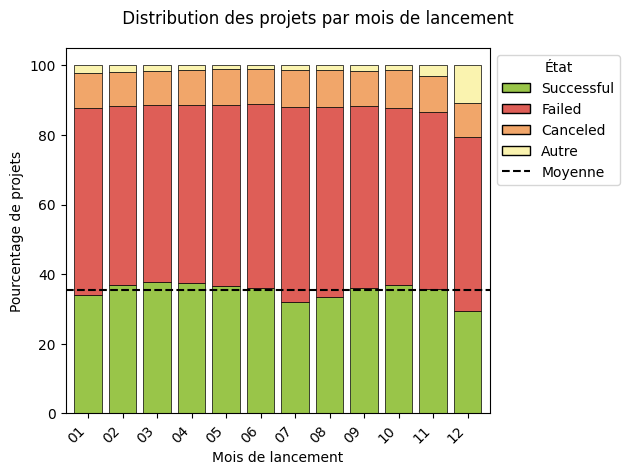

In [152]:
# Définir les couleurs pour chaque état
colors = {'failed': '#DE5E57',
          'successful': '#99C549',
          'Autre': '#FAF3AF',
          'canceled': '#F1A66A'}

# Copier et filtrer le dataframe
df_grouped = financement.copy()
df_grouped['etat'] = df_grouped['etat'].replace({'undefined': 'Autre', 'suspended': 'Autre', 'live': 'Autre'})

# Réorganiser les colonnes dans l'ordre souhaité
ordered_columns = ['successful', 'failed', 'canceled', 'Autre']
grouped = df_grouped.groupby(['month_lancement', 'etat']).size().unstack(fill_value=0)[ordered_columns]
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Trier les données par year_lancement dans l'ordre chronologique
grouped = grouped.sort_values(by='month_lancement')

# Création du graphique d'histogramme empilé à 100%
plt.figure(figsize=(16, 8))  
ax = grouped.plot(kind='bar', stacked=True, color=[colors.get(col, '#CCCCCC') for col in grouped.columns], edgecolor='black', linewidth=0.5, width=0.8)  # Ajustement de la largeur des colonnes

# Calculer la moyenne sur toutes les catégories
mean_overall = df_grouped['etat'].value_counts(normalize=True)['successful'] * 100

# Ajouter la ligne de moyenne sur toutes les catégories au graphique
ax.axhline(mean_overall, color='black', linestyle='--', label='Moyenne globale')

# Légende avec les couleurs correspondant à chaque état
legend_labels = [label.capitalize() for label in grouped.columns]
patches = [plt.Rectangle((0,0),1,1,fc=colors.get(col, '#CCCCCC'), edgecolor='black') for col in grouped.columns]
ax.legend(patches + [plt.Line2D([0], [0], linestyle='--', color='black')], legend_labels + ['Moyenne'], title='État', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle(' Distribution des projets par mois de lancement', y=0.98)  
plt.xlabel('Mois de lancement')
plt.ylabel('Pourcentage de projets')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

#### <span style="color:lightblue;">**Histo Empilé**</span>

In [153]:
def feature_engineering_nom(df):
    # Créer une nouvelle colonne contenant le nombre de mots dans chaque nom
    df['nombre_mots_nom'] = df['nom'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

    # Créer une nouvelle colonne contenant le nombre total de caractères dans chaque nom 
    df['nombre_caracteres_nom'] = df['nom'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

    return df

financement = feature_engineering_nom(financement)

display(financement[['nom', 'nombre_mots_nom', 'nombre_caracteres_nom']].head(15))

,nom,nombre_mots_nom,nombre_caracteres_nom
0,The Songs of Adelaide & Abullah,6,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,8,45
2,Where is Hank?,3,14
3,ToshiCapital Rekordz Needs Help to Complete Album,7,49
4,Community Film Project: The Art of Neighborhoo...,8,58
5,Monarch Espresso Bar,3,20
6,Support Solar Roasted Coffee & Green Energy! ...,8,60
7,Chaser Strips. Our Strips make Shots their B*tch!,8,49
8,SPIN - Premium Retractable In-Ear Headphones w...,8,53
9,STUDIO IN THE SKY - A Documentary Feature Film...,10,57


C:\Users\mathe\AppData\Local\Temp\ipykernel_35184\543219929.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1600x800 with 0 Axes>

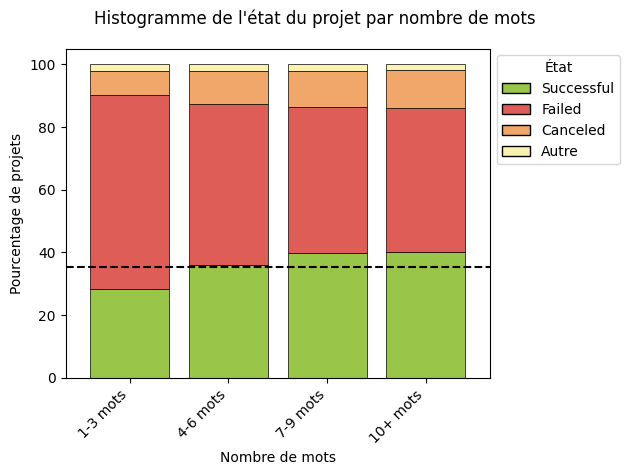

In [154]:
# Définir les couleurs pour chaque état
colors = {'failed': '#DE5E57',
          'successful': '#99C549',
          'Autre': '#FAF3AF',
          'canceled': '#F1A66A'}

# Copier et filtrer le dataframe
df_grouped = financement.copy()
df_grouped['etat'] = df_grouped['etat'].replace({'undefined': 'Autre', 'suspended': 'Autre', 'live': 'Autre'})

# Créer une nouvelle colonne pour les classes
df_grouped['classe'] = pd.cut(df_grouped['nombre_mots_nom'], bins=[0, 3, 6, 9, float('inf')], labels=['1-3 mots', '4-6 mots', '7-9 mots', '10+ mots'])

# Réorganiser les colonnes dans l'ordre souhaité
ordered_columns = ['successful', 'failed', 'canceled', 'Autre']
grouped = df_grouped.groupby(['classe', 'etat']).size().unstack(fill_value=0)[ordered_columns]
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Trier les données par classe dans l'ordre des classes
class_order = ['1-3 mots', '4-6 mots', '7-9 mots', '10+ mots']
grouped = grouped.reindex(class_order)

# Création du graphique d'histogramme empilé à 100%
plt.figure(figsize=(16, 8))  
ax = grouped.plot(kind='bar', stacked=True, color=[colors.get(col, '#CCCCCC') for col in grouped.columns], edgecolor='black', linewidth=0.5, width=0.8)  # Ajustement de la largeur des colonnes

# Calculer la moyenne sur toutes les catégories
mean_overall = df_grouped['etat'].value_counts(normalize=True)['successful'] * 100

# Ajouter la ligne de moyenne sur toutes les catégories au graphique
ax.axhline(mean_overall, color='black', linestyle='--', label='Moyenne globale')

# Légende avec les couleurs correspondant à chaque état
legend_labels = [label.capitalize() for label in grouped.columns]
patches = [plt.Rectangle((0,0),1,1,fc=colors.get(col, '#CCCCCC'), edgecolor='black') for col in grouped.columns]
ax.legend(patches + [plt.Line2D([0], [0], linestyle='--', color='black')] + patches[:4], legend_labels, title='État', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Histogramme de l\'état du projet par nombre de mots', y=0.98)  
plt.xlabel('Nombre de mots')
plt.ylabel('Pourcentage de projets')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

#### <span style="color:lightblue;">**Courbe écart**</span>

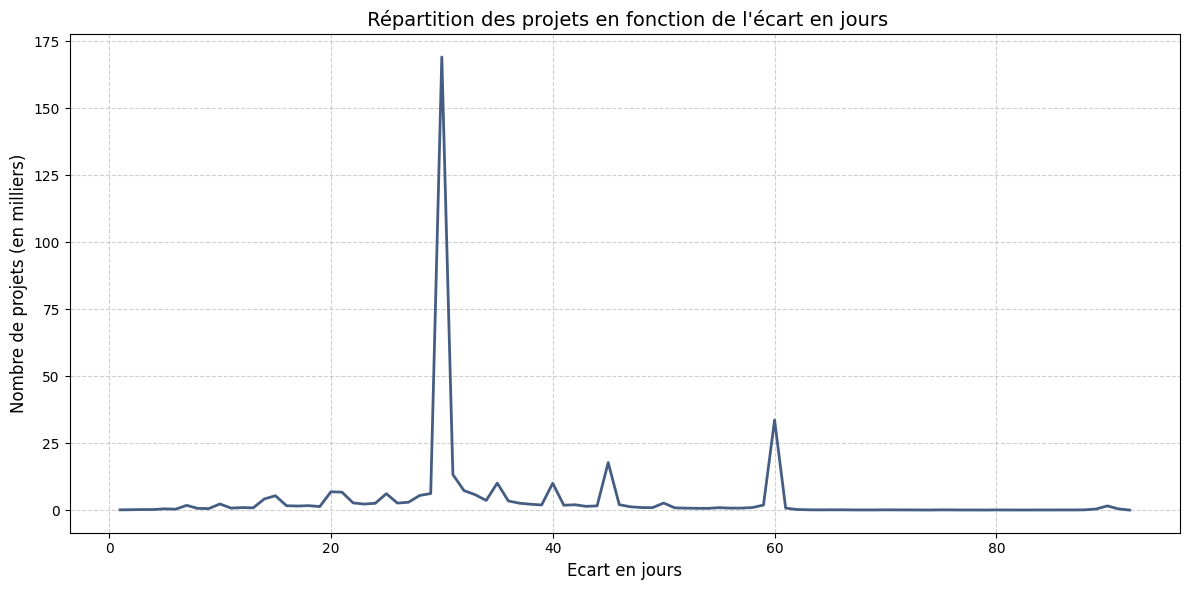

In [155]:
def plot_project_count_by_days_difference(df):
    # Filtrer les projets avec un écart en jours supérieur à 1000
    filtered_df = df[df['ecart_jours'] <= 1000]

    # Grouper les données par écart en jours et compter le nombre de projets pour chaque écart
    project_counts = filtered_df['ecart_jours'].value_counts().sort_index()

    # Diviser les valeurs par 1000 pour représenter en milliers
    project_counts_in_thousands = project_counts / 1000

    # Créer un graphique en courbe pour représenter le nombre de projets en milliers en fonction de l'écart en jours
    plt.figure(figsize=(12, 6))
    plt.plot(project_counts_in_thousands.index, project_counts_in_thousands.values, linestyle='-', color='#455D83', linewidth=2)
    plt.xlabel('Ecart en jours', fontsize=12)
    plt.ylabel('Nombre de projets (en milliers)', fontsize=12)
    plt.title(' Répartition des projets en fonction de l\'écart en jours', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()  

# Utilisation de la fonction pour créer le graphique
plot_project_count_by_days_difference(financement)

#### <span style="color:lightblue;">**Fonction exploration variables quantitatives**</span>

In [156]:
def obtenir_informations_statistiques(df):
    # Sélectionner les variables numériques
    variables_numeriques = ['objectif_usd', 'promesse_usd2']

    # Obtenir les informations statistiques classiques
    statistiques = df[variables_numeriques].describe().transpose()

    display(statistiques)

obtenir_informations_statistiques(financement)

,count,mean,std,min,25%,50%,75%,max
objectif_usd,378661.0,45454.401465,1.152950e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08
promesse_usd2,378661.0,9058.924074,9.097334e+04,0.00,31.0,624.33,4050.0,2.033899e+07


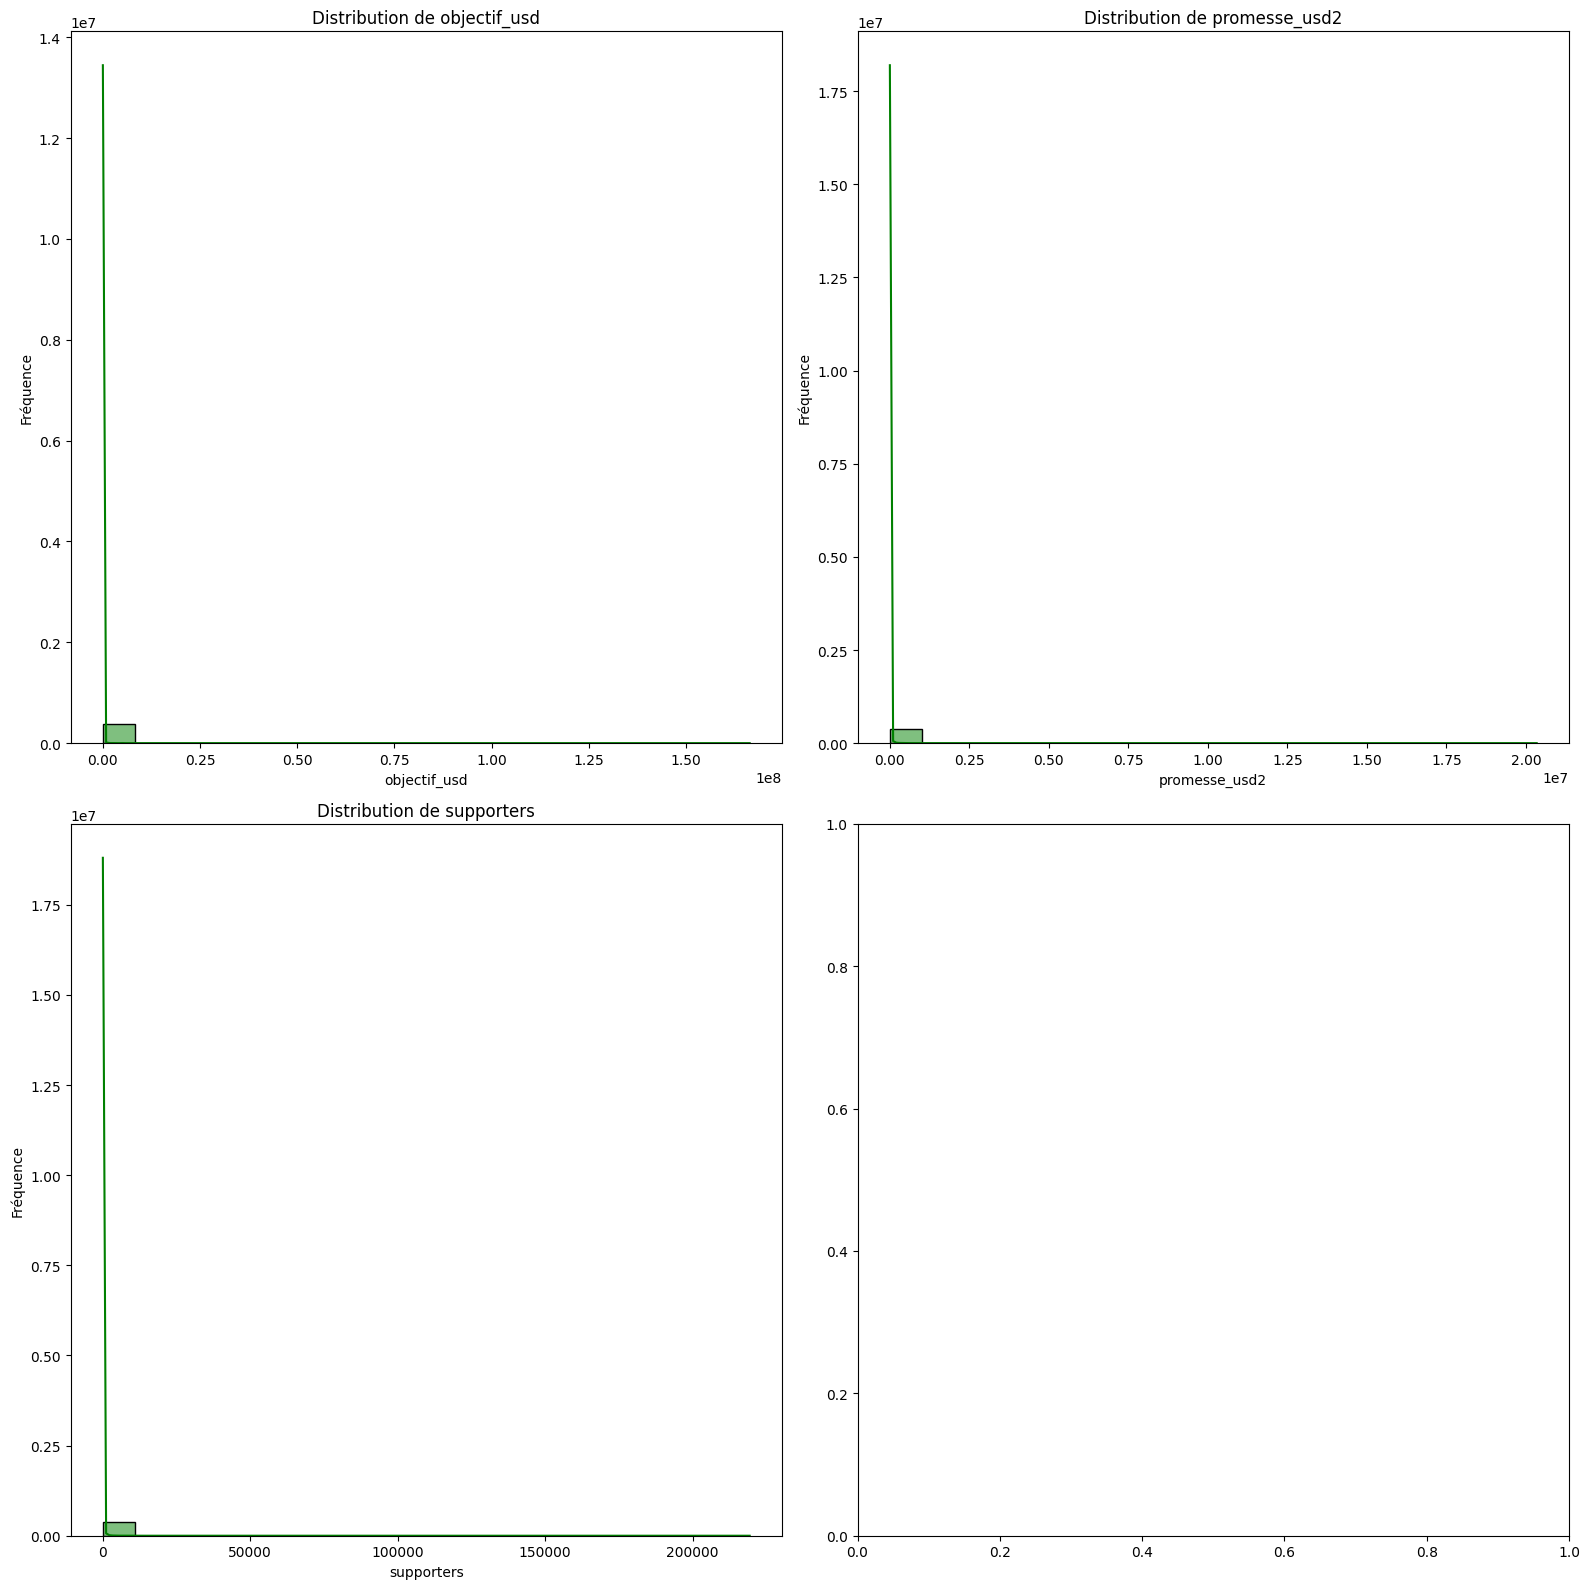

In [157]:
def explore_variables_numeriques(df):
    # Sélectionner les variables numériques
    variables_numeriques = ['objectif_usd', 'promesse_usd2','supporters']

    num_graphs = len(variables_numeriques)
    num_cols = 2
    num_rows = (num_graphs + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8*num_rows))

    for i, var in enumerate(variables_numeriques):
        row_pos = i // num_cols
        col_pos = i % num_cols
        if num_rows == 1:
            sns.histplot(data=df, x=var, kde=True, ax=axes[col_pos], bins=20, color="green")
            axes[col_pos].set_title(f'Distribution de {var}')
            axes[col_pos].set_xlabel(var)
            axes[col_pos].set_ylabel('Fréquence')
        else:
            sns.histplot(data=df, x=var, kde=True, ax=axes[row_pos, col_pos], bins=20, color="green")
            axes[row_pos, col_pos].set_title(f'Distribution de {var}')
            axes[row_pos, col_pos].set_xlabel(var)
            axes[row_pos, col_pos].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

explore_variables_numeriques(financement)

### On **n'observe** pas grand chose... En effet, les valeurs extrêmes maximales empèchent une bonne lisibilité des graphes

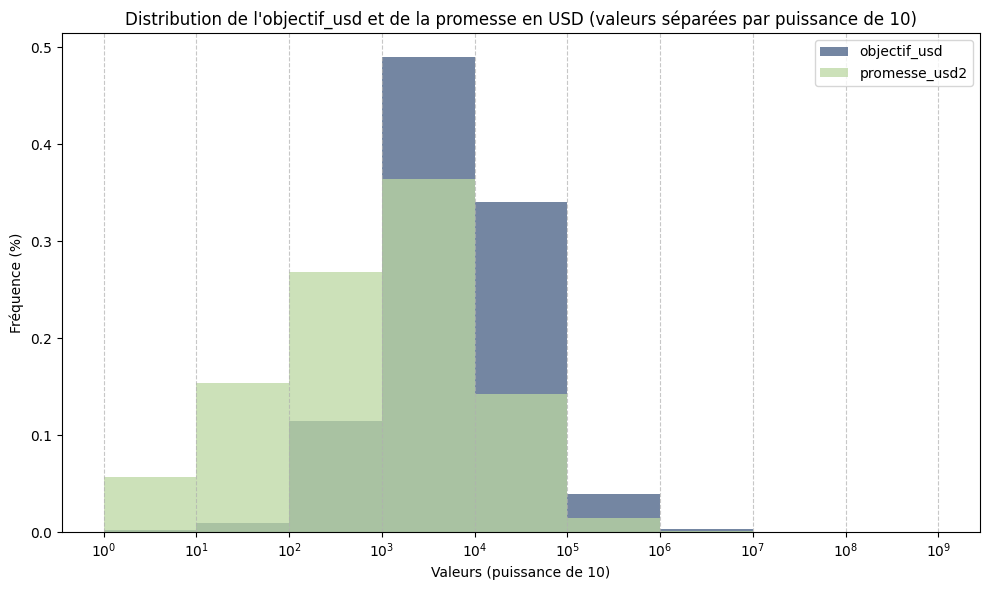

In [158]:
def histoplot_combined_objectif_promesse(df):
    # Séparer les valeurs par puissance de 10
    bins_objectif = [10**i for i in range(0, int(np.ceil(np.log10(df['objectif_usd'].max()))) + 1)]
    bins_promesse = [10**i for i in range(0, int(np.ceil(np.log10(df['promesse_usd2'].max()))) + 1)]

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x='objectif_usd', bins=bins_objectif, color='#455D83', stat='probability', label='objectif_usd', multiple='layer')
    sns.histplot(data=df, x='promesse_usd2', bins=bins_promesse, color='#BCD7A2', stat='probability', label='promesse_usd2', multiple='layer')

    plt.title('Distribution de l\'objectif_usd et de la promesse en USD (valeurs séparées par puissance de 10)')
    plt.xlabel('Valeurs (puissance de 10)')
    plt.ylabel('Fréquence (%)')
    plt.xscale('log')  # Utiliser une échelle logarithmique sur l'axe x pour mieux visualiser les valeurs
    plt.xticks([10**i for i in range(0, int(np.ceil(np.log10(max(df['objectif_usd'].max(), df['promesse_usd2'].max())))) + 1)])  # Marques de graduations sur l'axe x
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.legend()
    plt.tight_layout()
    plt.show()

histoplot_combined_objectif_promesse(financement)

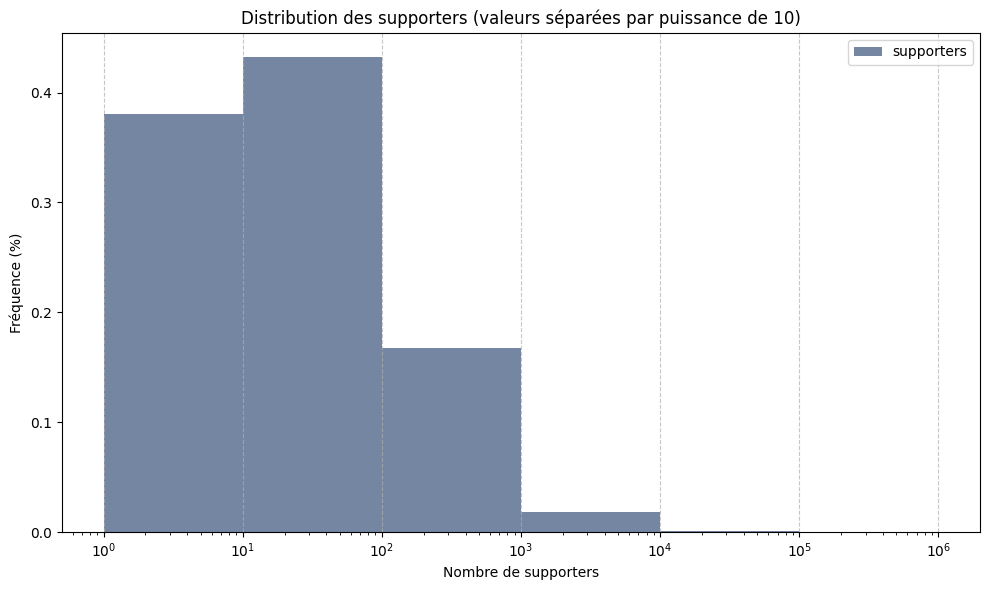

In [159]:
def histoplot_supporters(df):
    # Séparer les valeurs par puissance de 10
    bins_supporters = [10**i for i in range(0, int(np.ceil(np.log10(df['supporters'].max()))) + 1)]

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x='supporters', bins=bins_supporters, color='#455D83', stat='probability', label='supporters')

    plt.title('Distribution des supporters (valeurs séparées par puissance de 10)')
    plt.xlabel('Nombre de supporters')
    plt.ylabel('Fréquence (%)')
    plt.xscale('log')
    plt.xticks([10**i for i in range(0, int(np.ceil(np.log10(df['supporters'].max()))) + 1)])  
    plt.grid(axis='x', linestyle='--', alpha=0.7)  
    plt.legend()

    plt.tight_layout()
    plt.show()

histoplot_supporters(financement)

### Ici aussi, on visualise beaucoup mieux la repartition du nombre de <span style="color:orange;">**supporters**</span> potentiels

---
### <span style="color:orange;">**Feature Engineering**</span>

#### <span style="color:lightblue;">**Dummifier les variables catégorielles**</span>

In [160]:
# Sélectionner les variables catégorielles à dummifier
cat_columns = ['categorie', 'categorie_principale', 'monaie']

# Dummification des variables catégorielles
financement = pd.get_dummies(financement, columns=cat_columns, drop_first=False) 

# Afficher les premières lignes du nouveau DataFrame
display(financement.head())

,ID,nom,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,...,monaie_EUR,monaie_GBP,monaie_HKD,monaie_JPY,monaie_MXN,monaie_NOK,monaie_NZD,monaie_SEK,monaie_SGD,monaie_USD
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,...,False,False,False,False,False,False,False,False,False,True
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,...,False,False,False,False,False,False,False,False,False,True
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,...,False,False,False,False,False,False,False,False,False,True
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,...,False,False,False,False,False,False,False,False,False,True


#### <span style="color:lightblue;">**Feature Engineering sur la variable nom**</span>

In [161]:
from sklearn.preprocessing import OrdinalEncoder  
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
ord_enc = OrdinalEncoder()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [162]:
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\w\s]', '', text)
    else:
        return ''

In [163]:
stop_words = set(stopwords.words('english'))

# Nettoyer les données : supprimer les valeurs manquantes et convertir en chaînes de caractères
financement['nom'] = financement['nom'].dropna().astype(str)

# Nettoyage de la ponctuation dans la colonne 'nom'
financement['nom_Nettoye'] = financement['nom'].apply(clean_text)

# Tokenization de la colonne 'nom'
financement['tokens'] = financement['nom_Nettoye'].apply(lambda x: nltk.word_tokenize(x))

# Filtrage des stopwords
financement['nom_filtre'] = financement['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])  

financement['nom_filtre'] = financement['nom_filtre'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Adapter et transformer les données avec l'encodeur ordinal
financement["nom_filtre"] = ord_enc.fit_transform(financement[["nom_filtre"]])

### Feature Engineering Sur les pays

In [164]:
unique_countries = financement['pays'].unique()
print("Pays uniques dans l'ensemble de données :")
for country in unique_countries:
    print(country)

Pays uniques dans l'ensemble de données :
GB
US
CA
AU
NO
IT
DE
IE
MX
ES
N,0"
SE
FR
NL
NZ
CH
AT
DK
BE
HK
LU
SG
JP


In [165]:
pays_continent = {
    'GB': 'Europe',
    'US': 'Amerique_du_Nord',
    'CA': 'Amerique_du_Nord',
    'AU': 'Océanie',
    'NO': 'Europe',
    'IT': 'Europe',
    'DE': 'Europe',
    'IE': 'Europe',
    'MX': 'Amerique_du_Nord',
    'ES': 'Europe',
    'SE': 'Europe',
    'FR': 'Europe',
    'NL': 'Europe',
    'NZ': 'Océanie',
    'CH': 'Europe',
    'AT': 'Europe',
    'DK': 'Europe',
    'BE': 'Europe',
    'HK': 'Asie',
    'LU': 'Europe',
    'SG': 'Asie',
    'JP': 'Asie'
}

financement['continent'] = financement['pays'].map(pays_continent)

financement['continent'] = financement['continent'].fillna('Autres')

display(financement[['pays', 'continent']].head(15))

,pays,continent
0,GB,Europe
1,US,Amerique_du_Nord
2,US,Amerique_du_Nord
3,US,Amerique_du_Nord
4,US,Amerique_du_Nord
5,US,Amerique_du_Nord
6,US,Amerique_du_Nord
7,US,Amerique_du_Nord
8,US,Amerique_du_Nord
9,US,Amerique_du_Nord


In [166]:
# Dummification de Continent
financement = pd.get_dummies(financement, columns=["continent"], drop_first=False) # Suppression de la variable initiale

### **Intéressons nous de plus prêt aux corrélations potentielles maintenant que nous disposons de toutes nos variables au format quantitatif**

In [167]:
# Suppression des colonnes non quantitatives
financement_quanti = financement.drop(['ID', 'nom', 'nom_Nettoye', 'tokens', 'date_butoire', 'lancement', 'pays'], axis=1)
filter_categ = financement_quanti.filter(like='categorie').columns
filter_monaie = financement_quanti.filter(like='monaie').columns
filter_continent = financement_quanti.filter(like='continent').columns

drop_list = ['etat'] # Target non quanti
drop_list.extend(filter_categ)
drop_list.extend(filter_monaie)
drop_list.extend(filter_continent) # Avec la problématique définit, nous ne disposons pas de cette donnée en entrée

print(drop_list)

data_corr = financement_quanti.drop(drop_list, axis=1)
data_corr = data_corr.assign(target=(financement['etat'] == 'successful').astype(int))

correlation = data_corr.corr()

# Création de la heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title='Corrélation')
))

fig.update_layout(
    title='Heatmap des corrélations entre les variables qualitatives de financement',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800,
    height=600
)

fig.show()

['etat', 'categorie_3D Printing', 'categorie_Academic', 'categorie_Accessories', 'categorie_Action', 'categorie_Animals', 'categorie_Animation', 'categorie_Anthologies', 'categorie_Apparel', 'categorie_Apps', 'categorie_Architecture', 'categorie_Art', 'categorie_Art Books', 'categorie_Audio', 'categorie_Bacon', 'categorie_Blues', 'categorie_Calendars', 'categorie_Camera Equipment', 'categorie_Candles', 'categorie_Ceramics', "categorie_Children's Books", 'categorie_Childrenswear', 'categorie_Chiptune', 'categorie_Civic Design', 'categorie_Classical Music', 'categorie_Comedy', 'categorie_Comic Books', 'categorie_Comics', 'categorie_Community Gardens', 'categorie_Conceptual Art', 'categorie_Cookbooks', 'categorie_Country & Folk', 'categorie_Couture', 'categorie_Crafts', 'categorie_Crochet', 'categorie_DIY', 'categorie_DIY Electronics', 'categorie_Dance', 'categorie_Design', 'categorie_Digital Art', 'categorie_Documentary', 'categorie_Drama', 'categorie_Drinks', 'categorie_Electronic Music

In [168]:
print(financement['ecart_jours'].mean())

34.481095227657455


### On **remarque** plusieurs corrélations mais rien qui semble improbable, en effet :
* Objectif et Objectif_usd sont liés, rien d'étonnant
* Promesse est corrélé à promesse_usd1 et 2, pour les même raisons que le sont celles du dessus
* On trouve aussi une forte corrélation entre l'année de lancement de la recherche de fond et l'année butoire, indiquant une récolte de fond sur une période assez courte (35 jours en moyenne d'après les données)
* On a une corrélation entre la taille du nom du projet et le nombre de mots qui le compose, la encore rien de surprenant
* Enfin, une corrélation fortement négative relie l'appartenance du projet aux EUA et à l'Europe, la encore c'est parfaitement normal (et peut être supprimé avec le paramètre *drop_first=True* dans le *get_dummies*)

In [169]:
data_corr = financement_quanti[filter_categ]
data_corr = data_corr.assign(target=(financement['etat'] == 'successful').astype(int))

correlation = data_corr.corr()

# Création de la heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title='Corrélation')
))

fig.update_layout(
    title='Heatmap des corrélations entre les variables qualitatives de financement',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800,
    height=600
)

fig.show()

In [170]:
data_corr = financement_quanti[filter_monaie]
data_corr = data_corr.assign(target=(financement['etat'] == 'successful').astype(int))

correlation = data_corr.corr()

# Création de la heatmap avec Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title='Corrélation')
))

fig.update_layout(
    title='Heatmap des corrélations entre les variables qualitatives de financement',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=800,
    height=600
)

fig.show()

### **Aucune corrélation** entre les **monaies** utilisés, ou les **catégories**, et l'**état** = "**successful**" n'est direct

---
### <span style="color:#33ff99;">**Import des librairies de modélisation**</span>

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

### <span style="color:orange;">**Modélisation du financement**</span>

#### <span style="color:lightblue;">**Selection de champs**</span>

In [26]:
# Supprimer les colonnes non pertinentes
liste_drop = ['objectif', 'promesse', 'promesse_usd1', 'promesse_usd2', 'supporters']
liste_drop.extend(filter_continent) # Cette donnée n'est pas dispo pour la problématique définit
data_reg = financement_quanti.drop(liste_drop, axis=1)

#### <span style="color:lightblue;">**Expérimentation de prédiction de l'état *"succès"* d'un projet en demande de financement**</span>

In [27]:
from sklearn.model_selection import train_test_split

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = data_reg.drop('etat', axis=1)
y = (data_reg['etat'] == "successful").astype(int)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### <span style="color:lightblue;">**Régression Linéaire**</span>

In [29]:
# Initialisation du modèle de régression linéaire
linear_model = LinearRegression()

# Entraînement du modèle
linear_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# Binarisation des prédictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.6762837864603277
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     48981
           1       0.58      0.31      0.40     26752

    accuracy                           0.68     75733
   macro avg       0.64      0.59      0.59     75733
weighted avg       0.66      0.68      0.65     75733



### La **régression linéaire** nous propose un premier modèle **peu satisfaisant** mais prometteur pour la suite avec une **accuracy** de **0.68**

#### <span style="color:lightblue;">**Régression Logistique**</span>

In [31]:
# Initialisation du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6506278636789775
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78     48981
           1       0.55      0.06      0.11     26752

    accuracy                           0.65     75733
   macro avg       0.60      0.52      0.45     75733
weighted avg       0.62      0.65      0.55     75733



/workspaces/Projet_Financement/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### La **régression logistique** nous propose un modèle légèrement **moins satisfaisant**, avec une **accuracy** de **0.65**

#### <span style="color:lightblue;">**Random Forest**</span>

In [27]:
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [5, 7, 9]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Model:", accuracy_best)

best_tree = best_rf_model.estimators_[0]
tree_rules = export_text(best_tree, feature_names=list(X_train.columns))
with open('best_tree_rules.txt', 'w') as file:
    file.write(tree_rules)

Best Parameters: {'max_depth': 9, 'n_estimators': 300}
Best Accuracy: 0.6738828997954153
Accuracy with Best Model: 0.673141166994573


In [30]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=9, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6731147584276339
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     48981
           1       0.70      0.13      0.22     26752

    accuracy                           0.67     75733
   macro avg       0.68      0.55      0.51     75733
weighted avg       0.68      0.67      0.59     75733



### Le **random forest** nous propose un modèle legèrement **moins satisfaisant** que la **régression linéaire** malgré le processus d'optimisation avec une **baisse** de **0.003 accuracy**

#### <span style="color:lightblue;">**Gradient Boosting Machine**</span> / reprise des paramètres opti du rf

In [31]:
gbm_model = GradientBoostingClassifier(n_estimators=300, max_depth=9, learning_rate=0.1, random_state=42)

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

# Calcul de l'accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Machine Accuracy:", accuracy_gbm)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Machine Accuracy: 0.7154608955145049
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     48981
           1       0.70      0.13      0.22     26752

    accuracy                           0.67     75733
   macro avg       0.68      0.55      0.51     75733
weighted avg       0.68      0.67      0.59     75733



### Le **GBM** nous propose un modèle légrement **plus performant** que la régression linéaire (en utilisant des paramètres obtenu lors de l'optimisation d'un modele de rf)

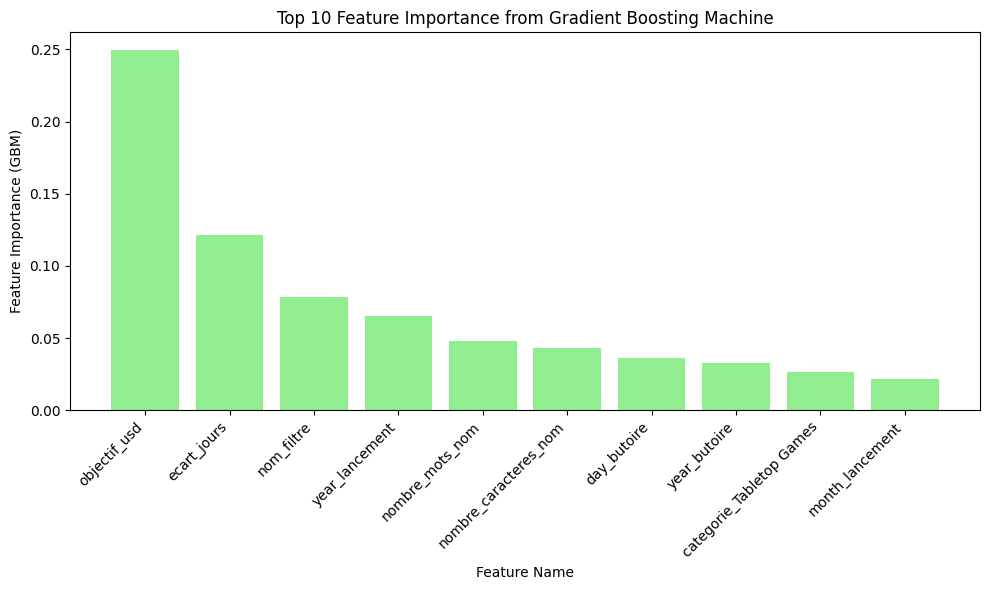

In [47]:
feature_names = X_train.columns

feature_importance_gbm = gbm_model.feature_importances_

sorted_indices_gbm = np.argsort(feature_importance_gbm)[::-1]

top_indices_gbm = sorted_indices_gbm[:10]
top_feature_importance_gbm = feature_importance_gbm[top_indices_gbm]
top_feature_names = feature_names[top_indices_gbm]

plt.figure(figsize=(10, 6))

plt.bar(range(len(top_feature_importance_gbm)), top_feature_importance_gbm, color='lightgreen')
plt.xticks(range(len(top_feature_importance_gbm)), top_feature_names, rotation=45, ha='right')

plt.xlabel('Feature Name')
plt.ylabel('Feature Importance (GBM)')
plt.title('Top 10 des Features Importantes issue du Gradient Boosting Machine')

plt.tight_layout()
plt.show()


### Les 10 variables les plus importantes quant à la réduction de l'erreur par le GBM sont les suivantes.
* on y retrouve le montant demandé, le nombre de jours pour effectuer la récolte de dons, le noms du projet et d'autres encore

#### <span style="color:lightblue;">**AdaBoost**</span> / reprise des param du rf

In [35]:
base_classifier = DecisionTreeClassifier(max_depth=3)

adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=300, learning_rate=0.1, random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\mathe\OneDrive - LECNAM\CNAM 2\Moreau\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.7080004753542049
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80     48981
           1       0.64      0.40      0.49     26752

    accuracy                           0.71     75733
   macro avg       0.68      0.64      0.64     75733
weighted avg       0.70      0.71      0.69     75733



#### **Importance des features**

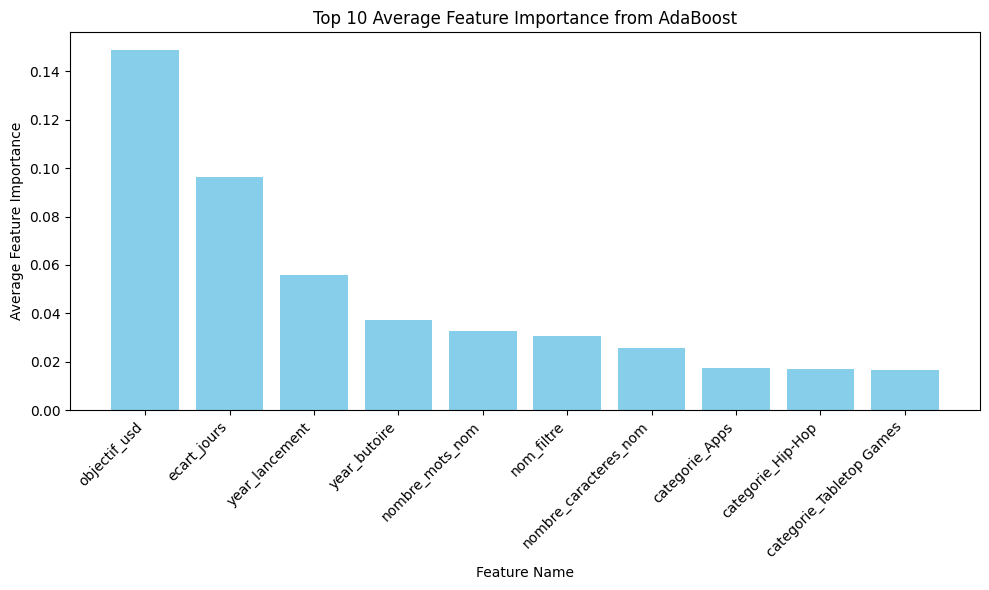

In [40]:
base_classifier_features = []

for base_classifier in adaboost_model.estimators_:
    base_classifier_features.append(base_classifier.feature_importances_)

base_classifier_features = np.array(base_classifier_features)

average_feature_importance = np.mean(base_classifier_features, axis=0)

#print("Average Feature Importance:", average_feature_importance)

sorted_indices = np.argsort(average_feature_importance)[::-1]

top_indices = sorted_indices[:10]
top_importances = average_feature_importance[top_indices]

feature_names = X_train.columns

plt.figure(figsize=(10, 6))

# Tracé des barres avec les noms des colonnes comme libellés
plt.bar(range(len(average_feature_importance[:10])), 
        average_feature_importance[sorted_indices[:10]], 
        color='skyblue')

# Définition des libellés pour l'axe des abscisses
plt.xticks(range(len(average_feature_importance[:10])), 
           feature_names[sorted_indices[:10]], 
           rotation=45, 
           ha='right')

plt.xlabel('Feature Name')  # Libellé de l'axe des abscisses
plt.ylabel('Average Feature Importance')  # Libellé de l'axe des ordonnées
plt.title('Top 10 Average Feature Importance from AdaBoost')  # Titre du graphe

plt.tight_layout()
plt.show()

### Les 10 variables les plus importantes quant à la réduction de l'erreur par l'AdaBoost sont les suivantes.
* on y retrouve encore le montant demandé, le nombre de jours pour effectuer la récolte de dons, le noms du projet et d'autres encore
* on voit l'apparition de l'année de lancement comme celle butoire contrairement au GBM

#### <span style="color:lightblue;">**SVM**</span> *Abandonné, bcp trop demandant en temps d'exécution*

##### <span style="color:lightblue;">**kernel poly**</span> puisque nous avons déjà fais une regression linéaire et logistique

In [36]:
svm_model = SVC(kernel='poly', degree=3, random_state=42)

svm_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)

# Calcul de l'accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy with Polynomial Kernel:", accuracy_svm)

---
### <span style="color:orange;">**Modélisation du niveau de financement**</span>

#### <span style="color:lightblue;">**Selection de champs**</span>

In [52]:
# Data preparation
financement_finance = financement[financement['etat'] == 'successful']

# Supprimer les colonnes non nécessaires
liste_drop = ['objectif', 'promesse', 'promesse_usd1', 'supporters','etat','nom', 'nom_Nettoye', 'tokens', 'lancement','date_butoire','pays']
filter_continent = financement_finance.filter(like='continent').columns
liste_drop.extend(filter_continent)  # Ces données ne sont pas nécessaires pour la problématique définie

data_reg = financement_finance.drop(liste_drop, axis=1)

# Utilisation des données dummifiées
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### <span style="color:lightblue;">**Expérimentation de prédiction de la *promesse* d'un projet en demande de financement**</span>

In [53]:
# Utilisation des données dummifiées
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### <span style="color:lightblue;">**Régression Linéaire**</span>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
financement_finance = financement[financement['etat'] == 'successful']

# Supprimer les colonnes non nécessaires
liste_drop = ['ID','objectif', 'promesse', 'promesse_usd1', 'supporters','etat','nom','lancement','date_butoire','pays']
filter_continent = financement_finance.filter(like='continent').columns
liste_drop.extend(filter_continent)  # Ces données ne sont pas nécessaires pour la problématique définie

data_reg = financement_finance.drop(liste_drop, axis=1)

# Utilisation des données dummifiées
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calcul de l'erreur en pourcentage
errors = abs(y_pred - y_test)
percentage_errors = (errors / y_test) * 100
mean_percentage_error = percentage_errors.mean()
print("Mean Percentage Error:", mean_percentage_error)

feature_names = X_train.columns

feature_importance_lr = np.abs(model.coef_)  # Utilisation de la valeur absolue des coefficients
sorted_indices_lr = np.argsort(feature_importance_lr)[::-1]
top_indices_lr = sorted_indices_lr[:10]
top_feature_importance_lr = feature_importance_lr[top_indices_lr]

# Tracé du graphique d'importance des fonctionnalités pour le modèle de régression linéaire
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importance_lr)), top_feature_importance_lr, color='lightcoral')
plt.xticks(range(len(top_feature_importance_lr)), feature_names[top_indices_lr], rotation=45, ha='right')
plt.xlabel('Feature Name')
plt.ylabel('Absolute Coefficient Value')
plt.title('Top 10 des Features Importantes issue de la Régression Linéaire')
plt.tight_layout()
plt.show()


Mean Squared Error: 11294446208.035143
R-squared: 0.37109802234546596
Mean Percentage Error: 884.7535339669603


#### <span style="color:lightblue;">**Random Forest**</span>

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Encodage des variables catégorielles
X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calcul de l'erreur en pourcentage
errors = abs(y_pred - y_test)
percentage_errors = (errors / y_test) * 100
mean_percentage_error = percentage_errors.mean()
print("Mean Percentage Error:", mean_percentage_error)

feature_names = X_train.columns

feature_importance_gbm = model.feature_importances_

sorted_indices_gbm = np.argsort(feature_importance_gbm)[::-1]

top_indices_gbm = sorted_indices_gbm[:10]
top_feature_importance_gbm = feature_importance_gbm[top_indices_gbm]
top_feature_names = feature_names[top_indices_gbm]

# Calcul de l'importance des fonctionnalités pour le modèle Random Forest
feature_importance_rf = model.feature_importances_

# Tri des indices des fonctionnalités par importance décroissante
sorted_indices_rf = np.argsort(feature_importance_rf)[::-1]

# Sélection des 10 premières fonctionnalités les plus importantes
top_indices_rf = sorted_indices_rf[:10]
top_feature_importance_rf = feature_importance_rf[top_indices_rf]

# Tracé du graphique d'importance des fonctionnalités pour le modèle Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importance_rf)), top_feature_importance_rf, color='lightblue')
plt.xticks(range(len(top_feature_importance_rf)), top_feature_names, rotation=45, ha='right')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance (Random Forest)')
plt.title('Top 10 des Features Importantes issue du Random Forest')
plt.tight_layout()
plt.show()


Mean Squared Error: 13471264158.063324
R-squared: 0.2498875540718939
Mean Percentage Error: 140.07098907906033


#### <span style="color:lightblue;">**GBM**</span>

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split


X = data_reg.drop('promesse_usd2', axis=1)  # Assurez-vous de remplacer 'target_column' par le nom de votre colonne cible
y = financement_finance['promesse_usd2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calcul de l'erreur en pourcentage
errors = abs(y_pred - y_test)
percentage_errors = (errors / y_test) * 100
mean_percentage_error = percentage_errors.mean()
print("Mean Percentage Error:", mean_percentage_error)

feature_names = X_train.columns

feature_importance_gbm = model.feature_importances_

sorted_indices_gbm = np.argsort(feature_importance_gbm)[::-1]

top_indices_gbm = sorted_indices_gbm[:10]
top_feature_importance_gbm = feature_importance_gbm[top_indices_gbm]
top_feature_names = feature_names[top_indices_gbm]

plt.figure(figsize=(10, 6))

plt.bar(range(len(top_feature_importance_gbm)), top_feature_importance_gbm, color='lightgreen')
plt.xticks(range(len(top_feature_importance_gbm)), top_feature_names, rotation=45, ha='right')

plt.xlabel('Feature Name')
plt.ylabel('Feature Importance (GBM)')
plt.title('Top 10 des Features Importantes issue du Gradient Boosting Machine')

plt.tight_layout()
plt.show()

Mean Squared Error: 11623117176.2737
R-squared: 0.3527968309354962
Mean Percentage Error: 484.8422088032707


---